<h1 align="center">Урок 7. Многомерный статистический анализ. Линейная регрессия.</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):<br /> zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],<br />
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
<br />Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак),<br />
а за y - значения скорингового балла (то есть, ks - целевая переменная).<br />
Произвести расчет как с использованием intercept, так и без.

$ Уравнение\ парной\ линейной\ регрессии:$

$$ \hat{y} = w_0+w_1x $$

$ Формулы\ расчёта\ коэффициентов\ w_0\ и\ w_1 :$ 

$$  w_1 = \frac{n\displaystyle\sum_{i=1}^{n}x_iy_i - \displaystyle\sum_{i=1}^{n}x_i * \displaystyle\sum_{i=1}^{n}y_i}{n\displaystyle\sum_{i=1}^{n}x_i^2 - \left(\displaystyle\sum_{i=1}^{n}x_i\right)^2}$$

$$ w_0 = \overline{y} - w_1\overline{x}$$

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

$ 1.1\ Расчет\ с\ использованием\ intercept:$

In [3]:
w_1 = (len(zp)*np.sum(zp * ks) - np.sum(zp) * np.sum(ks)) / (len(zp)*np.sum(zp**2) - np.sum(zp) ** 2)
w_0 = np.mean(ks) - w_1*np.mean(zp)
print(f"intercept: {w_0}, slope: {w_1}\nУравнение парной линейной регрессии c intercept: y = {w_0} + {w_1}x")

intercept: 444.17735732435955, slope: 2.6205388824027653
Уравнение парной линейной регрессии c intercept: y = 444.17735732435955 + 2.6205388824027653x


$ 1.2\ Расчет\ без\ использования\ intercept:$

In [4]:
W_1 = np.mean(ks) / np.mean(zp)
print(f"slope: {W_1}\nУравнение парной линейной регрессии без intercept: y = {W_1}x")

slope: 7.000986193293885
Уравнение парной линейной регрессии без intercept: y = 7.000986193293885x


$ 1.3\ Визуализация\ линейной\ регрессии:$

Text(0, 0.5, 'ks')

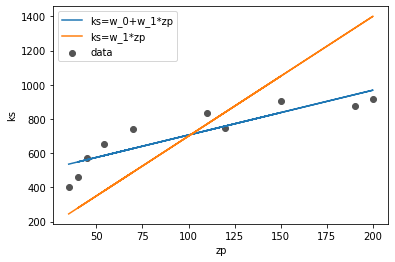

In [5]:
plt.scatter(zp, ks, color="#545454", label="data")
plt.plot(zp, w_0 + w_1*zp, label="ks=w_0+w_1*zp")
plt.plot(zp, W_1*zp, label="ks=w_1*zp")
plt.legend()
plt.xlabel("zp")
plt.ylabel("ks")

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [6]:
x, y = zp, ks

$ Метод\ градиентного\ спуска\ используется\ для\ минимизации\ функции\ потерь,\ в\ данном\ случае-среднеквадратической\ ошибки.$ 
$ Представим\ её\ производную\ в\ общем\ виде:$

$$ mse = \frac{\displaystyle\sum_{i=1}^{n}(y_i-\hat{y})^2}{n}$$ 

$$ (mse)' = \left(\frac{\displaystyle\sum_{i=1}^{n}(y_i-\hat{y})^2}{n}\right)'=\frac{\displaystyle\sum_{i=1}^{n}2*(y_i-\hat{y})'*(y_i-\hat{y})}{n}$$ 

$ Найдем\ производную\ mse\ по\ переменной\ w_1\ без\ учёта\ intercept:$

$$ (mse)'_{w_1} = \frac{\displaystyle\sum_{i=1}^{n}2*(y_i-\hat{y})'_{w_1}*(y_i-\hat{y})}{n}=\frac{\displaystyle\sum_{i=1}^{n}2*(y_i-w_1x)'_{w_1}*(y_i-w_1x)}{n}=\frac{\displaystyle\sum_{i=1}^{n}-2x*(y_i-w_1x)}{n}$$ 

In [7]:
w_1 = 0.1
alpha = 1e-6
epsilon = 1
n = len(zp)
i = 0

while alpha < abs(epsilon):
    w_prev = w_1
    w_1 -= alpha * np.mean(-2*x * (y-w_1*x))
    epsilon = w_prev - w_1
    i += 1

print(f"y = {w_1}x\nКоэффициент найден за {i} итераций, с точностью {alpha}")

y = 5.8897853464590435x
Коэффициент найден за 430 итераций, с точностью 1e-06


3*. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

$ Определим\ частную\ производную\ mse\ по\ переменной\ w_0\ с\ учётом\ intercept:$

$$ (mse)'_{w_0} = \frac{\displaystyle\sum_{i=1}^{n}2*(y_i-\hat{y})'_{w_0}*(y_i-\hat{y})}{n}=\frac{\displaystyle\sum_{i=1}^{n}2*(y_i-w_0-w_1x)'_{w_0}*(y_i-w_0-w_1x)}{n}=\frac{\displaystyle\sum_{i=1}^{n}-2*(y_i-w_0-w_1x)}{n}$$ 

$ Выразим\ частную\ производную\ mse\ по\ переменной\ w_1\ с\ учётом\ intercept:$

$$ (mse)'_{w_1} = \frac{\displaystyle\sum_{i=1}^{n}2*(y_i-\hat{y})'_{w_1}*(y_i-\hat{y})}{n}=\frac{\displaystyle\sum_{i=1}^{n}2*(y_i-w_0-w_1x)'_{w_1}*(y_i-w_0-w_1x)}{n}=\frac{\displaystyle\sum_{i=1}^{n}-2x*(y_i-w_0-w_1x)}{n}$$ 

In [8]:
w_0 = 442
w_1 = 0.1
alpha = 1e-6
epsilon_0 = 1
epsilon_1 = 1
n = len(zp)
i = 0

while abs(epsilon_0) > alpha or abs(epsilon_1) > alpha:
    w0_prev = w_0
    w1_prev = w_1
    w_0 -= alpha * np.mean(-2 * (y-w_0-w_1*x))
    w_1 -= alpha * np.mean(-2*x * (y-w_0-w_1*x))
    epsilon_0 = w0_prev - w_0
    epsilon_1 = w1_prev - w_1
    i += 1

print(f"y = {w_0} + {w_1}x\nКоэффициенты найдены за {i} итераций, с точностью {alpha}.")

y = 442.2061510108447 + 2.6350478250305724x
Коэффициенты найдены за 179094 итераций, с точностью 1e-06.
